# Part 1. Basic EDA

## Step 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_web
from datetime import datetime
import yfinance as yf
yf.pdr_override()  # update pandas datareader (yahoo finance api)

import matplotlib.pyplot as plt
import seaborn as sns

# MacOS - 한글 폰트
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Graph Style
import mplcyberpunk
plt.style.use('cyberpunk')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TS - Statistics
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller

# TS - Deep learning
### PYTORCH 관련 모듈 추가<<

# Reg - linear 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Reg - Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Reg - Distance based 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Reg - Ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Reg - Deep Learning
from sklearn.neural_network import MLPRegressor

In [3]:
# Processing
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import mean_squared_error

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

## Step 2. Load Datasets

In [4]:
# industry group
tickers_i = ['AAPL','TSLA','MSFT','META','AMZN']

# market
tickers_m = ['SPY','QQQ','DIA','IWM','XLP','GLD','TLT','SHY']

#================================================
## SPY :: S&P500
## QQQ :: NASDAQ
## DIA :: Dow Jones
## IWM :: Russell 2000
## XLP :: Goods(필수소비재)
## GLD :: Gold(달러 대체재)
## TLT :: US Bond - Long(20+ 미 장기채)
## SHY :: US Bond - Short(5- 미 단기채)
#================================================

In [5]:
start_date = datetime(year=2010, month=1, day=2)
end_date = datetime(year=2022, month=12, day=31)

# industry group
df_i = pd_web.DataReader(tickers_i, start=start_date, end=end_date)
# market index
df_m = pd_web.DataReader(tickers_m, start=start_date, end=end_date)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  8 of 8 completed


In [6]:
display(df_i.head(3))
print(f'dates : {df_i.index[0]} ~ {df_i.index[-1]}')
print(f'stocks : {df_i["Adj Close"].columns.tolist()}')

Adj Close                                  Close               \
                AAPL    AMZN META       MSFT TSLA      AAPL    AMZN META   
Date                                                                       
2010-01-04  6.505281  6.6950  NaN  23.623896  NaN  7.643214  6.6950  NaN   
2010-01-05  6.516528  6.7345  NaN  23.631531  NaN  7.656429  6.7345  NaN   
2010-01-06  6.412873  6.6125  NaN  23.486515  NaN  7.534643  6.6125  NaN   

                            ...      Open                               \
                 MSFT TSLA  ...      AAPL    AMZN META       MSFT TSLA   
Date                        ...                                          
2010-01-04  30.950001  NaN  ...  7.622500  6.8125  NaN  30.620001  NaN   
2010-01-05  30.959999  NaN  ...  7.664286  6.6715  NaN  30.850000  NaN   
2010-01-06  30.770000  NaN  ...  7.656429  6.7300  NaN  30.879999  NaN   

               Volume                                 
                 AAPL       AMZN META      MSFT TSLA  
Date                                                  
2010-01-04  493729600  151998000  NaN  38409100  NaN  
2010-01-05  601904800  177038000  NaN  49749600  NaN  
2010-01-06  552160000  143576000  NaN  58182400  NaN  

[3 rows x 30 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['AAPL', 'AMZN', 'META', 'MSFT', 'TSLA']


In [7]:
display(df_m.head(3))
print(f'dates : {df_m.index[0]} ~ {df_m.index[-1]}')
print(f'stocks : {df_m["Adj Close"].columns.tolist()}')

Adj Close                                                          \
                  DIA         GLD        IWM        QQQ        SHY        SPY   
Date                                                                            
2010-01-04  78.578400  109.800003  53.236824  41.005447  73.689148  88.117897   
2010-01-05  78.452003  109.699997  53.053741  41.005447  73.777893  88.351166   
2010-01-06  78.504036  111.510002  53.003822  40.758144  73.786774  88.413391   

                                       Close              ...       Open  \
                  TLT        XLP         DIA         GLD  ...        TLT   
Date                                                      ...              
2010-01-04  63.388309  18.718468  105.660004  109.800003  ...  89.839996   
2010-01-05  63.797691  18.725483  105.489998  109.699997  ...  90.050003   
2010-01-06  62.943687  18.711443  105.559998  111.510002  ...  90.169998   

                        Volume                                         \
                  XLP      DIA       GLD       IWM       QQQ      SHY   
Date                                                                    
2010-01-04  26.450001  8977300  16224100  42863900  62822800  1220600   
2010-01-05  26.690001  6549200  14213100  55523100  62935600   598200   
2010-01-06  26.650000  6797200  24981900  59708600  96033000  1534900   

                                          
                  SPY      TLT       XLP  
Date                                      
2010-01-04  118944600  2829100   8465900  
2010-01-05  111579900  2841600  11805400  
2010-01-06  116074400  4099600   9267000  

[3 rows x 48 columns]

dates : 2010-01-04 00:00:00 ~ 2022-12-30 00:00:00
stocks : ['DIA', 'GLD', 'IWM', 'QQQ', 'SHY', 'SPY', 'TLT', 'XLP']


## Step 3. Drop NA's

In [8]:
df_i['Adj Close']

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2010-01-04,6.505281,6.695000,NaN,23.623896,NaN
2010-01-05,6.516528,6.734500,NaN,23.631531,NaN
2010-01-06,6.412873,6.612500,NaN,23.486515,NaN
2010-01-07,6.401017,6.500000,NaN,23.242252,NaN
2010-01-08,6.443574,6.676000,NaN,23.402546,NaN
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


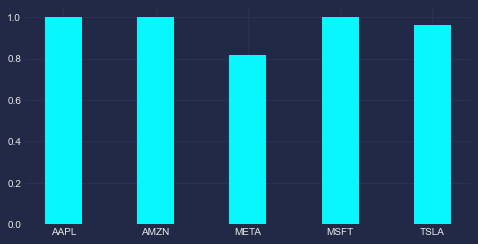

AAPL    1.000000
AMZN    1.000000
META    0.816932
MSFT    1.000000
TSLA    0.962714
dtype: float64


In [9]:
data = df_i['Adj Close'].notna().sum() / df_i['Adj Close'].shape[0]

plt.figure(figsize=(8,4))
plt.bar(x=data.index, height=data.values, width=0.4)
plt.show()

print(data)

In [10]:
# The first day that can tracking META's price
df_i['Adj Close']['META'].dropna().head(1)

Date
2012-05-18    38.23
Name: META, dtype: float64

In [11]:
# let's adjust the start_date to match the first day of the META's
start_date_adj = df_i['Adj Close']['META'].dropna().head(1).index[0]

# And only use "Adj Close" column
df_i_adj = df_i.loc[start_date_adj:, 'Adj Close']
display(df_i_adj)

# Check the NA
print(f'Values(NA) : \n{df_i_adj.isna().sum()}')

,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2012-05-18,16.122002,10.692500,38.230000,23.721565,1.837333
2012-05-21,17.061274,10.905500,34.029999,24.110569,1.918000
2012-05-22,16.930269,10.766500,31.000000,24.118683,2.053333
2012-05-23,17.343367,10.864000,32.000000,23.591898,2.068000
2012-05-24,17.184080,10.762000,33.029999,23.559471,2.018667
...,...,...,...,...,...
2022-12-23,131.658981,85.250000,118.040001,238.133545,123.150002
2022-12-27,129.831772,83.040001,116.879997,236.367981,109.099998
2022-12-28,125.847855,81.820000,115.620003,233.944031,112.709999


Values(NA) : 
AAPL    0
AMZN    0
META    0
MSFT    0
TSLA    0
dtype: int64


In [12]:
# apply same metric to df_m 
df_m_adj = df_m.loc[start_date_adj:, 'Adj Close']
display(df_m_adj)

# Check the NA
print(f'Values(NA) : \n{df_m_adj.isna().sum()}')

,DIA,GLD,IWM,QQQ,SHY,SPY,TLT,XLP
Date,,,,,,,,
2012-05-18,97.503471,154.550003,64.020844,54.816551,76.375168,105.475647,95.856750,25.012053
2012-05-21,98.689507,154.649994,65.529449,56.349007,76.384224,107.288597,95.656059,25.109058
2012-05-22,98.705322,152.080002,65.135132,56.285896,76.357094,107.475609,94.590950,25.138908
2012-05-23,98.610435,151.619995,65.555176,56.394077,76.393227,107.532501,95.247017,25.071745
2012-05-24,98.934669,151.410004,65.692307,56.024490,76.366089,107.743866,94.884277,25.310524
...,...,...,...,...,...,...,...,...
2022-12-23,330.227448,167.259995,173.748886,266.946716,80.829063,381.454193,101.390335,74.820312
2022-12-27,330.665161,168.669998,172.583191,263.172577,80.719727,379.949921,99.385551,75.178589
2022-12-28,326.884674,167.910004,169.903076,259.697968,80.719727,375.227936,98.800003,74.243088


Values(NA) : 
DIA    0
GLD    0
IWM    0
QQQ    0
SHY    0
SPY    0
TLT    0
XLP    0
dtype: int64


> '로그'와 '차분'은 모두 예측 안정성을 확보하기 위함

### 3-1. 기본 수익률 분포 (1일 변화량)
- 1일 전 대비 현재 주가(기본 주가)

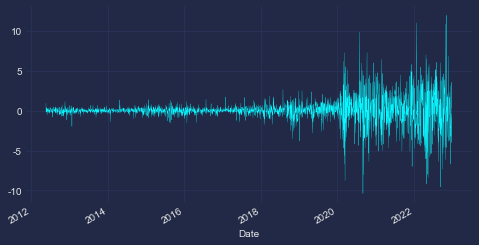

In [13]:
plt.figure(figsize=(8,4))
data = df_i_adj.diff(1)['AAPL']
data.plot(linewidth=0.25)

plt.show()

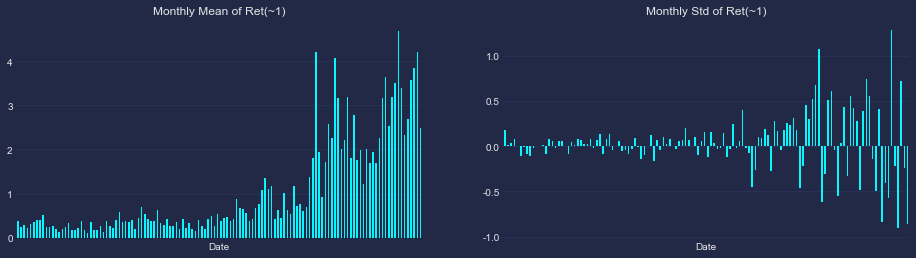

In [14]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Ret(~1)')
axes[1].set_title('Monthly Std of Ret(~1)')
plt.show()

### 3-2. 로그 수익률 1차 차분 분포 (로그 변환 + 1일 변화량)
- 1일 전 대비 현재 주가(로그변환된 주가)

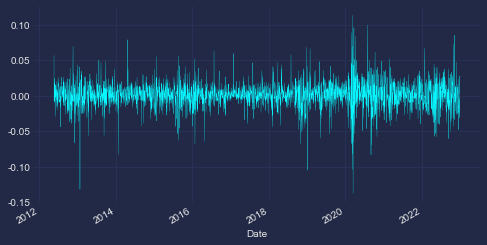

In [15]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(1)['AAPL']
data.plot(linewidth=0.25)
plt.show()

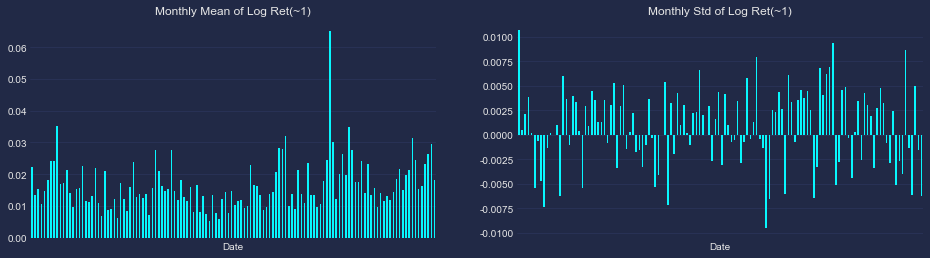

In [16]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~1)')
axes[1].set_title('Monthly Std of Log Ret(~1)')

plt.show()

### 3-3. 로그 수익률 5차 차분 분포 (로그 변환 + 5일 변화량)
- 5일 전 대비 현재 주가(로그변환된 주가)

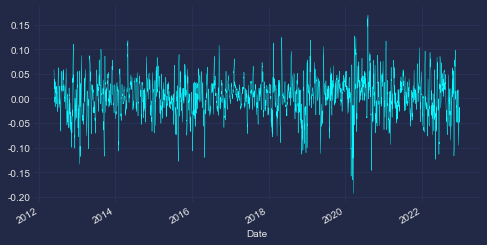

In [17]:
plt.figure(figsize=(8,4))
data = np.log(df_i_adj).diff(5)['AAPL']
data.plot(linewidth=0.4)
plt.show()

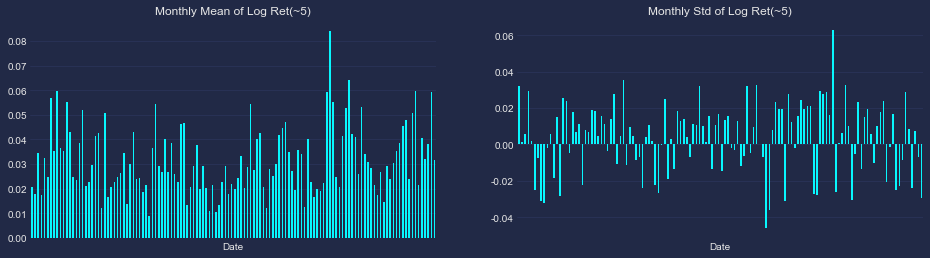

In [18]:
data_stats = data.dropna().resample('M')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
data_stats.std().plot.bar(xticks=[], ax=axes[0])
data_stats.mean().plot.bar(xticks=[], ax=axes[1])

axes[0].set_title('Monthly Mean of Log Ret(~5)')
axes[1].set_title('Monthly Std of Log Ret(~5)')
plt.show()

# Part 2. Correlation and Stationarity

## Step 1. Data Preprocessing

In [19]:
# y (target to forcasting)
y = np.log(df_i_adj['AAPL']).diff(1).shift(-1)

# x (y-delayed)
y_delayed = pd.concat([np.log(df_i_adj['AAPL']).diff(x) for x in [5,20,60]], axis=1)
y_delayed.columns = ['AAPL_d5', 'AAPL_d20', 'AAPL_d60']

# x (y-related)
X = np.log(df_i_adj).diff(1)
X.columns = [f'{x}_d1' for x in df_i_adj.columns]

df_Xy = pd.concat([X, y_delayed, y], axis=1).dropna()
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,0.021497,0.044253,0.179090,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.021827,0.044012,0.121101,0.008696
2012-08-16,0.008696,0.017246,-0.064790,0.019023,0.030153,0.024837,0.039501,0.137506,0.018328
2012-08-17,0.018328,-0.001574,-0.042144,0.003891,-0.009617,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,-0.017836,-0.103575,-0.059279,-0.031166


## Step 2. Correlation check

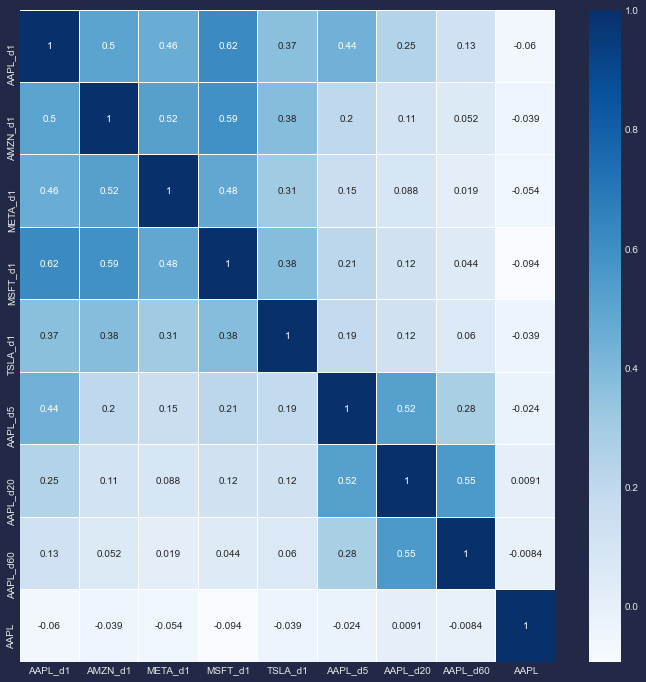

In [20]:
plt.figure(figsize=(12,12))

sns.heatmap(df_Xy.corr(), annot=True, cmap='Blues', linewidth=0.1);
plt.show()

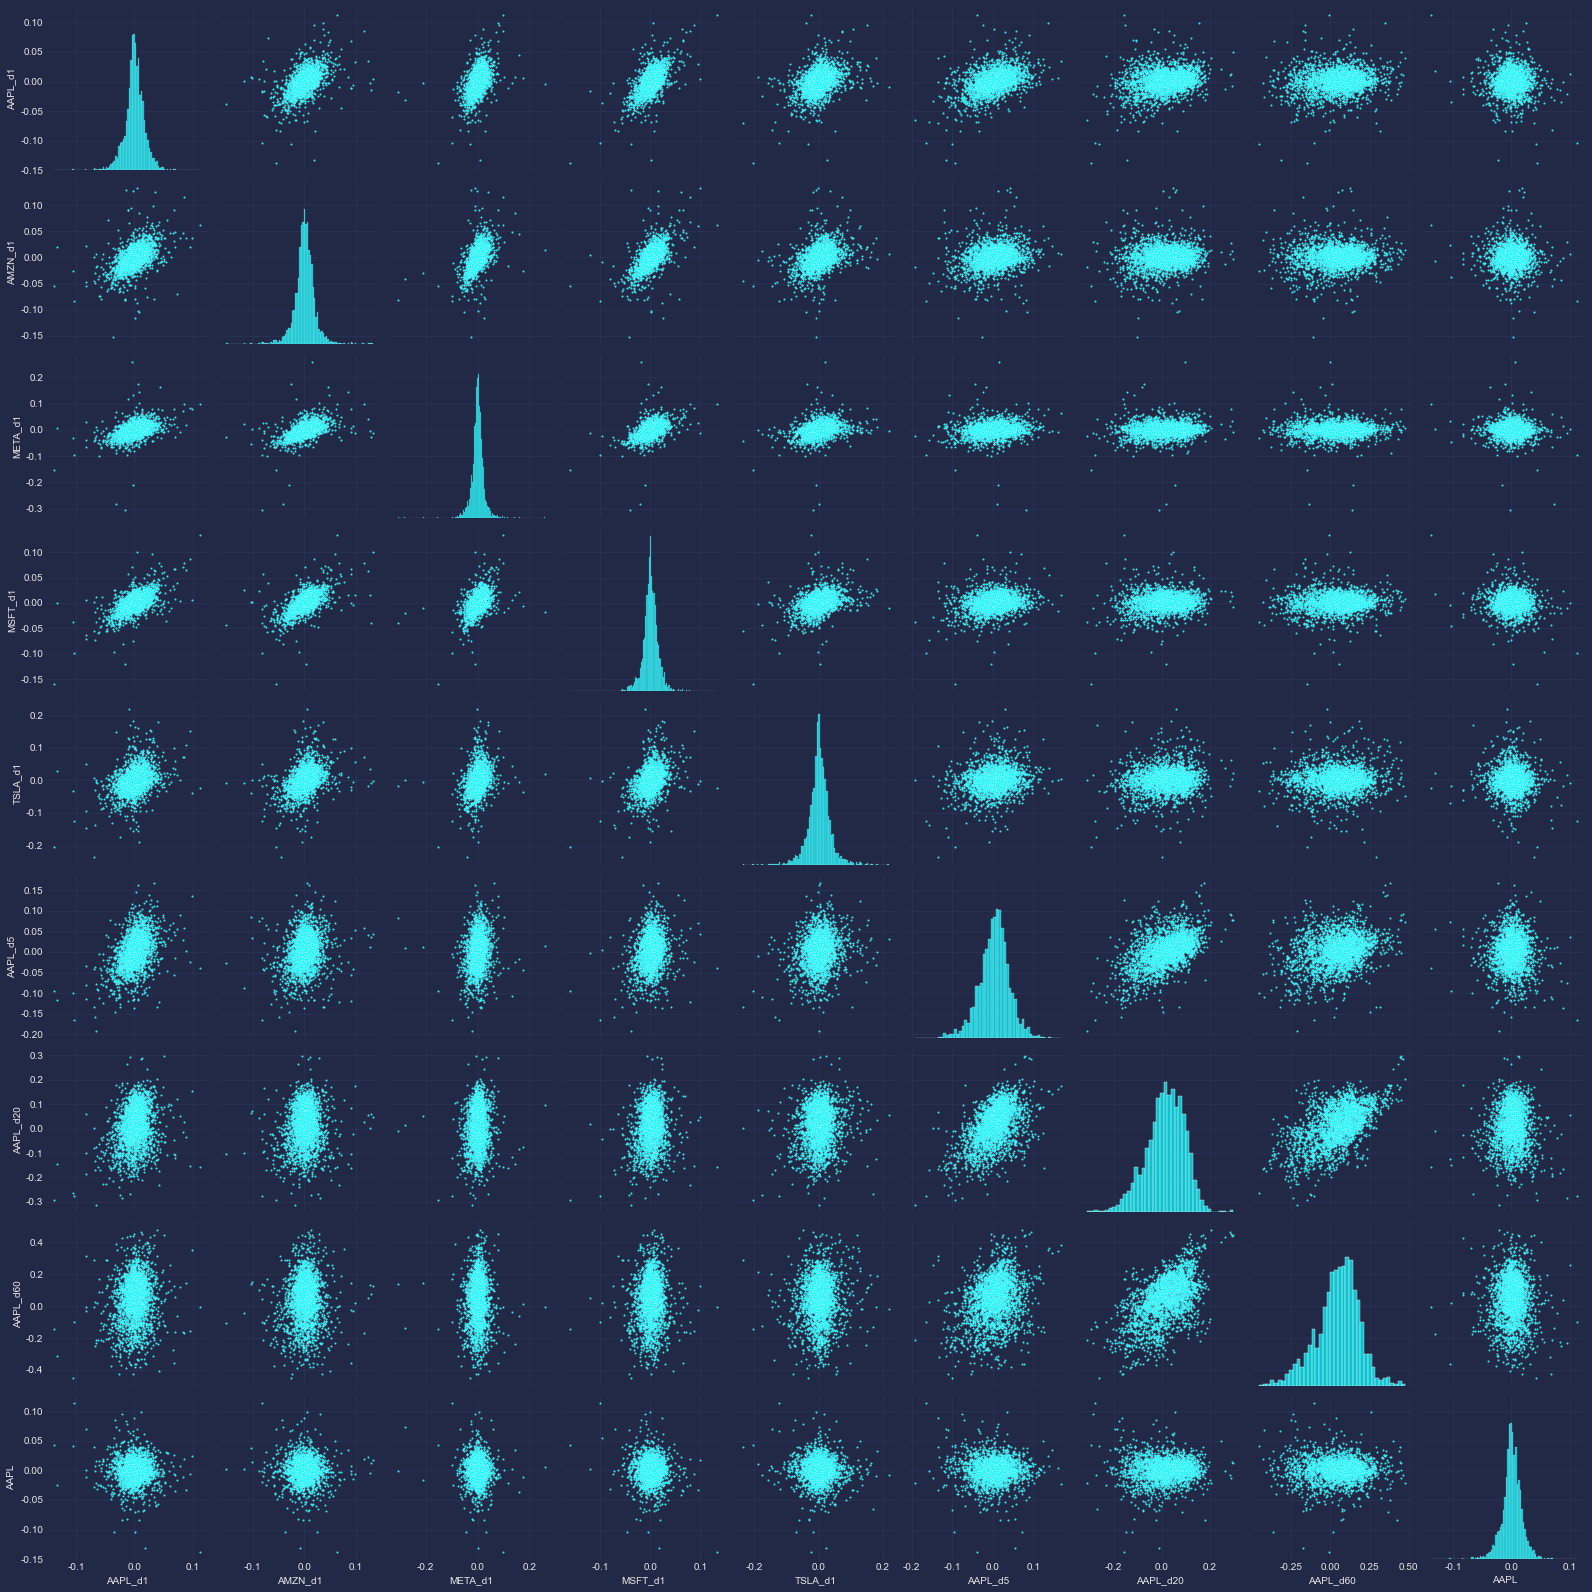

In [21]:
sns.pairplot(df_Xy, plot_kws={'s':3})
plt.show()

In [22]:
from scipy.stats import skew, kurtosis

print("<< skewness >> ")
print(f"AAPL_d1 : {skew(df_Xy['AAPL_d1']):.2f}")
print(f"AAPL_d5 : {skew(df_Xy['AAPL_d5']):.2f}")
print(f"AAPL_d20 : {skew(df_Xy['AAPL_d20']):.2f}")
print(f"AAPL_d60 : {skew(df_Xy['AAPL_d60']):.2f}")

print('\n')
print("<< kurtosis >> ")
print(f"AAPL_d1 : {kurtosis(df_Xy['AAPL_d1']):.2f}")
print(f"AAPL_d5 : {kurtosis(df_Xy['AAPL_d5']):.2f}")
print(f"AAPL_d20 : {kurtosis(df_Xy['AAPL_d20']):.2f}")
print(f"AAPL_d60 : {kurtosis(df_Xy['AAPL_d60']):.2f}")

<< skewness >> 
AAPL_d1 : -0.33
AAPL_d5 : -0.31
AAPL_d20 : -0.42
AAPL_d60 : -0.40


<< kurtosis >> 
AAPL_d1 : 5.85
AAPL_d5 : 1.44
AAPL_d20 : 0.36
AAPL_d60 : 0.49


- 주식 수익률 데이터는 우측으로 기울고(negative skew), 꼬리가 두꺼운(high kurtosis) 유사 정규분포 꼴
- 애플은 꾸준히 우상햔한 기업, 따라서 20일, 60일 전 대비 수익률은 negative skew가 더 강함
- 또한, 꾸준히 우상향한 탓에 일간 변화량보다 20일, 60일 전 대비 수익률이 조금 더 확정적, 즉 예측불가구간의 확률이 더 낮음(low kurtosis)

## Step 3. Correlation by month

- 예측변수의 지연값(d5, d20, d60)은 서로 양의 상관관계가 존재한다. 
- d5와 d20의 경우 0.52, d20과 d60은 0.55로 꽤 밀접한 관련이 있다.
- 따라서 이 중 일부 변수를 소거할지, 그대로 사용할지 판단하기 위해 각 기간(by month)별 상관계수를 확인해보자.
- 만약, 전체 기간에 대해 꾸준히 관련이 있고 반대의 움직임이 존재하지 않는다면 일부 변수를 소거한다.

In [23]:
window_size = 20
i_li = np.arange(0, df_Xy.shape[0], window_size)
i_li

array([   0,   20,   40,   60,   80,  100,  120,  140,  160,  180,  200,
        220,  240,  260,  280,  300,  320,  340,  360,  380,  400,  420,
        440,  460,  480,  500,  520,  540,  560,  580,  600,  620,  640,
        660,  680,  700,  720,  740,  760,  780,  800,  820,  840,  860,
        880,  900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080,
       1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300,
       1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520,
       1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740,
       1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960,
       1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180,
       2200, 2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400,
       2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600])

- 5일, 20일, 60일 전 대비 현재 수익률 상관관계

In [24]:
def get_r_between_cols(col1, col2):
    r_li = []
    r_ts = []
    for i in i_li:
        start_i = i
        end_i = i+window_size
        
        df_window = df_Xy[[col1,col2]].iloc[start_i:end_i]
        r = df_window.corr().iloc[0,1]
        r_t = df_window.index[0]
        
        r_li.append(r)
        r_ts.append(r_t)
    return r_li, r_ts

In [25]:
r_aapl_20_60 = get_r_between_cols('AAPL_d20', 'AAPL_d60')
r_aapl_5_60 = get_r_between_cols('AAPL_d5', 'AAPL_d60')
r_aapl_5_20 = get_r_between_cols('AAPL_d5', 'AAPL_d20')

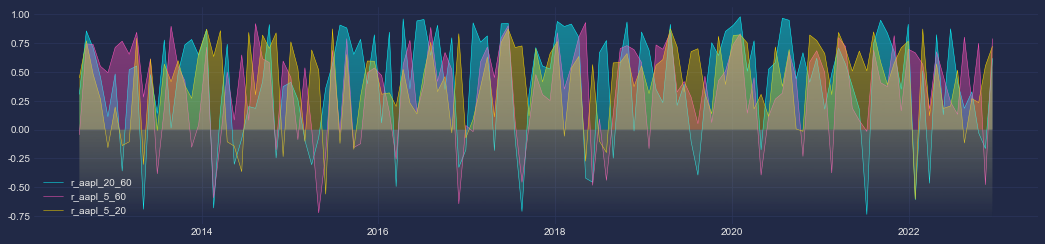

In [26]:
x = r_aapl_20_60[1]

plt.figure(figsize=(18,4))
plt.fill_between(x=x, y1=r_aapl_20_60[0], alpha=0.2)
plt.plot(x, r_aapl_20_60[0], linewidth=0.5, label='r_aapl_20_60')

plt.fill_between(x=x, y1=r_aapl_5_60[0], alpha=0.2)
plt.plot(x, r_aapl_5_60[0], linewidth=0.5, label='r_aapl_5_60')

plt.fill_between(x=x, y1=r_aapl_5_20[0], alpha=0.2)
plt.plot(x, r_aapl_5_20[0], linewidth=0.5, label='r_aapl_5_20')

plt.legend()
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.3, gradient_start='bottom')

plt.show()

- 많은 기간에서 양의 상관관계를 보이지만 상당 기간에서 음의 상관관계가 존재한다.
- 따라서 일부 변수를 제거했을 때 발생하는 정보손실을 고려해 모든 변수를 사용하도록 한다.

## Step 4. Stationary Test

- 예측변수(AAPL)과 나머지 변수들간 상관관계 x

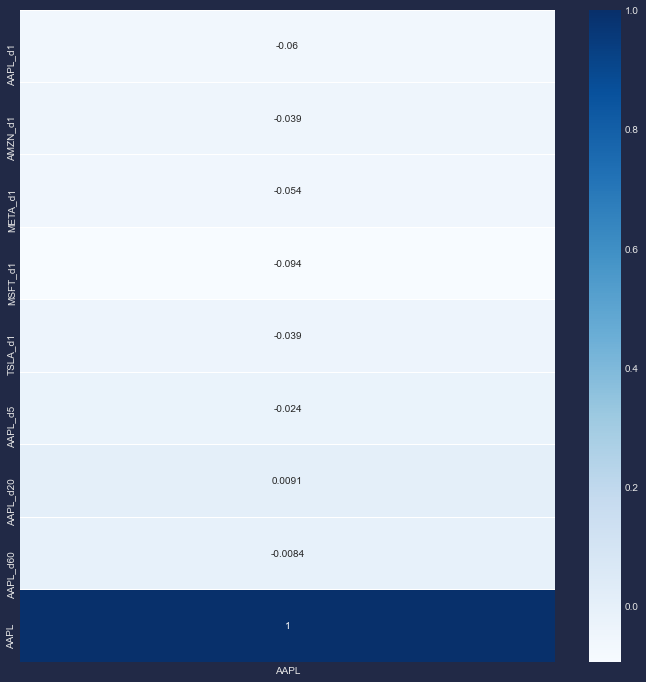

In [27]:
plt.figure(figsize=(12,12))

sns.heatmap(df_Xy.corr()[['AAPL']], annot=True, cmap='Blues', linewidth=0.1);
plt.show()

### 4-1. 시계열 분해

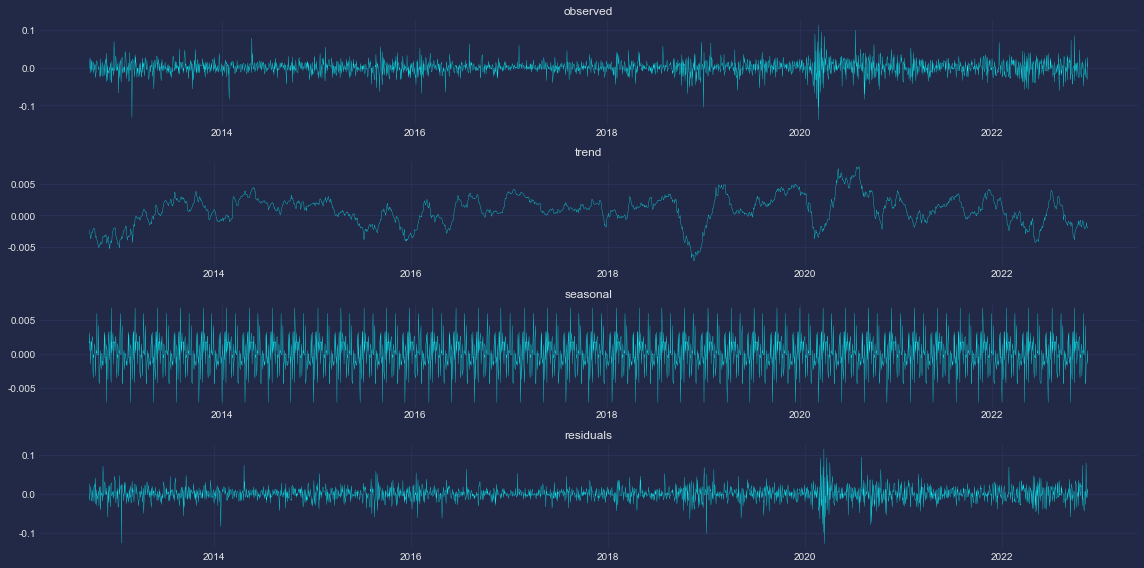

In [28]:
res = sm.tsa.seasonal_decompose(df_Xy['AAPL'], freq=60)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16,8))

axes[0].plot(res.observed, linewidth=0.3)
axes[0].set_title('observed')

axes[1].plot(res.trend, linewidth=0.3)
axes[1].set_title('trend')

axes[2].plot(res.seasonal, linewidth=0.3)
axes[2].set_title('seasonal')

axes[3].plot(res.resid, linewidth=0.3)
axes[3].set_title('residuals')

plt.tight_layout()
plt.show()

In [29]:
res.trend.dropna()

Date
2012-09-26   -0.002375
2012-09-27   -0.002499
2012-09-28   -0.002816
2012-10-01   -0.003455
2012-10-02   -0.003701
                ...   
2022-11-09   -0.001660
2022-11-10   -0.001126
2022-11-11   -0.001500
2022-11-14   -0.001990
2022-11-15   -0.001965
Name: trend, Length: 2552, dtype: float64

### 4-2. 정상성 검정

In [30]:
def adf_test(x):
    adf_res = adfuller(x.dropna(), autolag='AIC')
    stats, pval, c = adf_res[0], adf_res[1], adf_res[4]
    print(f'<<{x.name}>>')
    print(f'stats: {stats:.2f}')
    print(f'p-value: {pval:.2f}')
    print(f'critical values: {c}\n')

In [31]:
adf_test(res.observed)
adf_test(res.trend)

<<AAPL>>
stats: -16.40
p-value: 0.00
critical values: {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}

<<trend>>
stats: -6.04
p-value: 0.00
critical values: {'1%': -3.4329434877271816, '5%': -2.862685793891119, '10%': -2.567379949649765}



- 앞서 분석 데이터에 대해 로그차분(수익률)을 수행했다.
- 따라서 예측변수 y(AAPL)는 물론 y의 trend에도 어떠한 추세나 계절성이 존재해선 안된다.
- 추세가 남아있다면 차분(diff) 수를 늘려야 한다.
- 그러나 분석 결과 y와 y의 trend는 모두 (약)정상성 검정을 통과(h0 기각)하였으므로 해당 데이터를 계속해서 사용해 예측 모델을 구현한다.

# Part 3. Modeling

## Step 1. Train-Test Dataset Split

In [32]:
df_Xy

,AAPL_d1,AMZN_d1,META_d1,MSFT_d1,TSLA_d1,AAPL_d5,AAPL_d20,AAPL_d60,AAPL
Date,,,,,,,,,
2012-08-14,0.002679,0.003221,-0.058139,-0.001989,-0.057782,0.021497,0.044253,0.179090,-0.001363
2012-08-15,-0.001363,0.017977,0.039447,0.002321,-0.000680,0.021827,0.044012,0.121101,0.008696
2012-08-16,0.008696,0.017246,-0.064790,0.019023,0.030153,0.024837,0.039501,0.137506,0.018328
2012-08-17,0.018328,-0.001574,-0.042144,0.003891,-0.009617,0.041603,0.074274,0.131726,0.025952
2012-08-20,0.025952,-0.003406,0.049165,-0.005192,-0.016802,0.054293,0.101004,0.166905,-0.013760
...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.024060,-0.034947,-0.022291,-0.025860,-0.093023,-0.031782,-0.133201,-0.123368,-0.002802
2022-12-23,-0.002802,0.017274,0.007824,0.002265,-0.017707,-0.019898,-0.116214,-0.075803,-0.013976
2022-12-27,-0.013976,-0.026266,-0.009876,-0.007442,-0.121138,-0.017836,-0.103575,-0.059279,-0.031166


In [33]:
X = df_Xy.drop('AAPL', axis=1)
y = df_Xy['AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'train dataset : {X_train.shape,  y_train.shape}')
print(f'test dataset : {X_test.shape, y_test.shape}')

train dataset : ((2089, 8), (2089,))
test dataset : ((523, 8), (523,))


## Step 2. Model Selection

### 2-1. Modeling

In [34]:
models = []

# Basic Regression model
models.append(('Lr', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))

# Distance Based model
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

# Tree & Ensemble model
# --- Basic Tree
models.append(('Tree', DecisionTreeRegressor()))
# --- Boosting
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('GradBoost', GradientBoostingRegressor()))
# --- Bagging
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTrees', ExtraTreesRegressor()))

# Neural Network model
models.append(('MLP', MLPRegressor()))

In [35]:
models

[('Lr', LinearRegression()),
 ('Lasso', Lasso()),
 ('ElasticNet', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('SVR', SVR()),
 ('Tree', DecisionTreeRegressor()),
 ('AdaBoost', AdaBoostRegressor()),
 ('GradBoost', GradientBoostingRegressor()),
 ('RandomForest', RandomForestRegressor()),
 ('ExtraTrees', ExtraTreesRegressor()),
 ('MLP', MLPRegressor())]

In [164]:
res_cv = []
res_train = []
res_test = []

for _name, model in models:
    print(f'Start to build a "{_name}" model..')
    
    # cross validation
    kfold = KFold(n_splits=10) # shuffle=False
    score = cross_val_score(model, 
                             X_train, y_train,
                             cv=kfold, 
                             scoring='neg_mean_squared_error')
    rmse_cv = np.sqrt(-score)
    res_cv.append(rmse_cv)
    
    # predict train-set
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    res_train.append(rmse_train)
    
    # predict test-set
    y_test_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    res_test.append(rmse_test)
    print(f'... clear! >> [mean errors] cv: {np.mean(rmse_cv):.3f} | train: {np.mean(rmse_train):.3f} | test: {np.mean(rmse_test):.3f}')
    

Start to build a "Lr" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.018 | test: 0.018
Start to build a "Lasso" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.018 | test: 0.018
Start to build a "ElasticNet" model..
... clear! >> [mean errors] cv: 0.018 | train: 0.018 | test: 0.018
Start to build a "KNN" model..
... clear! >> [mean errors] cv: 0.020 | train: 0.016 | test: 0.019
Start to build a "SVR" model..
... clear! >> [mean errors] cv: 0.021 | train: 0.020 | test: 0.019
Start to build a "Tree" model..
... clear! >> [mean errors] cv: 0.027 | train: 0.000 | test: 0.027
Start to build a "AdaBoost" model..
... clear! >> [mean errors] cv: 0.019 | train: 0.017 | test: 0.018
Start to build a "GradBoost" model..
... clear! >> [mean errors] cv: 0.019 | train: 0.015 | test: 0.018
Start to build a "RandomForest" model..
... clear! >> [mean errors] cv: 0.019 | train: 0.007 | test: 0.018
Start to build a "ExtraTrees" model..
... clear! >> [mean errors] cv: 0.019 | train: 0.00

- cross validation은 해당 모델이 얼마나 Robust한가, 즉 이상값(혹은 특이값)에 대해 민감도를 확인
- 시계열의 경우 일반적으로 cross validation을 사용하지 않음. 데이터가 100개라고 가정하면, 앞의 80개로 뒤 20개를 예측해야 하나 cross validation은 그 20개를 앞, 중간에서도 추출하기 때문
- 그러나 시계열데이터에서도 cross validation이 일부 유용한 점이 있는데, 추세와 계절성을 제거해 정상성을 확보한 시계열에 대해 내재된 패턴을 추정하는 경우.
- 만약 예측을 위한 내재 패턴이 존재한다면, 모든 시계열 구간에 걸쳐 통용될 수록 좋은 모델.
- 2010년의 패턴이 2021년에도 적용될 뿐만 아니라 2021년에서 추출한 패턴이 과거 2010년에도 적용된다는 의미.

### 2-2. Çompare Cross Validation Scores

In [165]:
x_labels = [x for x,_ in models]
x_loc = np.arange(1, 1+len(x_labels))

In [172]:
sort_idx = np.argsort([np.mean(x) for x in res_cv])[::-1]

data = [np.array(x) for x in np.array(res_cv)[sort_idx].tolist()]
data_labels = np.array(x_labels)[sort_idx]

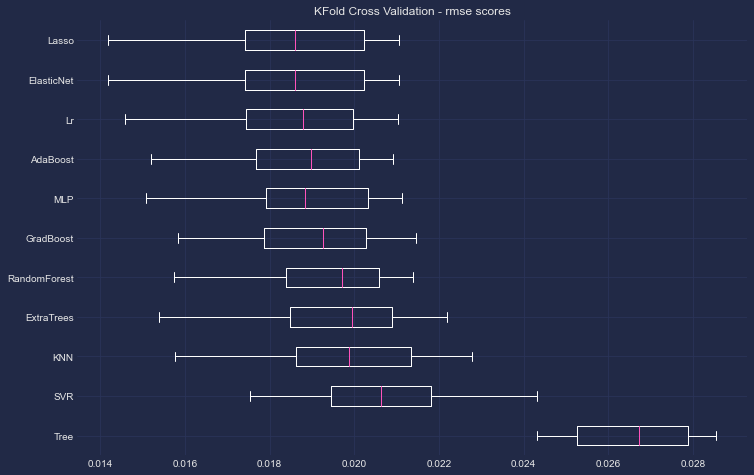

In [173]:
plt.figure(figsize=(12,8))

plt.boxplot(data, 0,  'rs', 0)
plt.yticks(x_loc, data_labels)
plt.title('KFold Cross Validation - rmse scores')

plt.show()

- 좌측으로 쏠린 모델일수록 cv 평가성능이 좋음
- Lasso, ElasticNet이 가장 예측력 우수
- 반면, 트리모델(Tree)과 거리기반 모형(KNN, SVR)의 성능은 떨어짐

### 2-3. Compare Model Accuracy(check error with rmse)

In [168]:
sort_idx = np.argsort(res_test)[::-1]

data_labels = np.array(x_labels)[sort_idx]
data_train = np.array(res_train)[sort_idx]
data_test = np.array(res_test)[sort_idx]

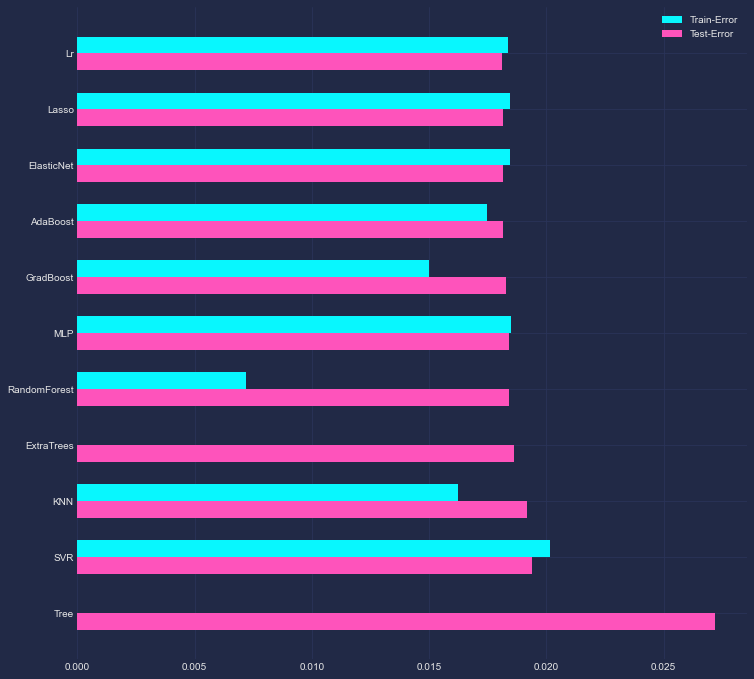

In [169]:
plt.figure(figsize=(12,12))

bar_width = 0.3
plt.barh(y=x_loc+bar_width/2, height=bar_width, width=data_train, label='Train-Error')
plt.barh(y=x_loc-bar_width/2, height=bar_width, width=data_test, label='Test-Error')

plt.yticks(x_loc, data_labels)
plt.legend()

plt.show()

- lr을 포함해 lasso, elasticnet과 같은 기본 모형이 예측 오차가 적었음
- 거리기반 모형(KNN, SVR)과 트리 모형(Tree)은 성능이 좋지 않았음
- 트리모형은 앙상블(ExtraTrees)을 포함해 과적합됨(Train Error 0)
- 신경망(MLP) 모형은 훈련, 테스트 셋 간 차이가 가장 적었으며, 일관적인 성능을 보임. 다만, 예측오차는 기본 선형회귀보다 떨어짐
- 이는 주가예측 케이스에 대해 설명변수와 예측변수간 선형 관계 존재로 인한 것, 앞에서 확인했듯 다양한 변수간 양의 상관관계를 보인 것과 유관